# Single Sequence Inference

VBox()

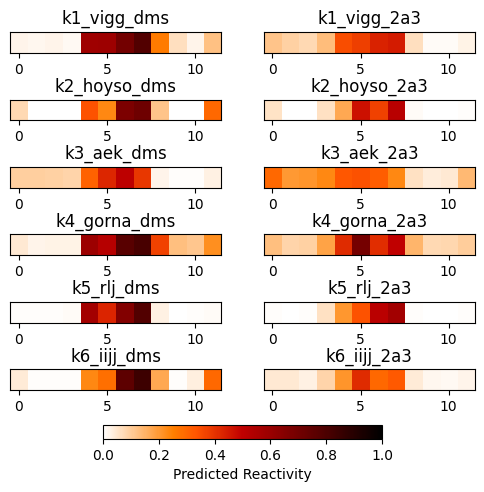

,k1_vigg_dms,k1_vigg_2a3,k2_hoyso_dms,k2_hoyso_2a3,k3_aek_dms,k3_aek_2a3,k4_gorna_dms,k4_gorna_2a3,k5_rlj_dms,k5_rlj_2a3,k6_iijj_dms,k6_iijj_2a3
0,0.020020,0.116089,0.074687,0.057682,0.094727,0.295898,0.043788,0.127279,0.006458,0.006634,0.040710,0.043335
1,0.017746,0.089966,0.000000,0.000000,0.095764,0.199219,0.022242,0.082475,0.004047,0.003611,0.006420,0.044647
2,0.019638,0.075562,0.000000,0.000000,0.092651,0.207642,0.026251,0.089975,0.004112,0.004173,0.003986,0.030518
3,0.014702,0.131714,0.000000,0.060069,0.085083,0.232056,0.024016,0.180177,0.009346,0.058594,0.004486,0.082275
4,0.582031,0.349121,0.339767,0.169946,0.306641,0.331299,0.592763,0.414712,0.570312,0.203491,0.230835,0.207031
5,0.586914,0.376953,0.231012,0.466357,0.424561,0.342285,0.522594,0.691991,0.428955,0.339111,0.284668,0.417480
6,0.695801,0.430420,0.674372,0.371624,0.504883,0.316650,0.769054,0.410676,0.659180,0.514160,0.756836,0.294434
7,0.784668,0.445312,0.707915,0.518275,0.390869,0.231689,0.808839,0.497680,0.781738,0.577148,0.838867,0.324707
8,0.261475,0.066223,0.113383,0.010772,0.020889,0.059784,0.367246,0.146863,0.030838,0.007305,0.170898,0.039368
9,0.063843,0.009232,0.000000,0.000000,0.006821,0.038422,0.125373,0.075629,0.003729,0.003433,0.006947,0.016083


In [1]:
%matplotlib inline

import sys
sys.path.insert(0, '..')

import pandas as pd
from matplotlib import pyplot as plt
from matplotlib.colors import Normalize
from matplotlib.cm import ScalarMappable
plt.ioff()

from src.util import progress
from src import models

# Sequence to infer reactivities for
SEQUENCE = 'GGGGAAAACCCC'
# Models to run
MODEL_NAMES = ['k1_vigg', 'k2_hoyso', 'k3_aek', 'k4_gorna', 'k5_rlj', 'k6_iijj']

# Use tqdm progress bars optimized for jupyter
with progress.NotebookProgress():
    df = pd.DataFrame()
    fig, axs = plt.subplots(
        len(MODEL_NAMES),
        2,
        squeeze=False,
        gridspec_kw={'hspace': 2.25},
        figsize=(min(len(SEQUENCE)/2, 16), len(MODEL_NAMES))
    )
    norm = Normalize(0, 1)

    for i, model in enumerate(progress.progress_manager.iterator(MODEL_NAMES, desc='models')):
        # Call inference method (eg, `src.models.k1_vigg.infer(SEQUENCE)`)
        inference = getattr(models, model).infer(SEQUENCE)

        df[f'{model}_dms'] = inference['reactivity_DMS_MaP']
        df[f'{model}_2a3'] = inference['reactivity_2A3_MaP']

        axs[i, 0].imshow(inference['reactivity_DMS_MaP'].to_numpy().reshape(1,-1), norm=norm, cmap='gist_heat_r', aspect='auto')
        axs[i, 0].locator_params(steps=[1, 5, 10], integer=True)
        axs[i, 0].set_yticks([])
        axs[i, 0].set_title(f'{model}_dms')

        axs[i, 1].imshow(inference['reactivity_2A3_MaP'].to_numpy().reshape(1,-1), norm=norm, cmap='gist_heat_r', aspect='auto')
        axs[i, 1].locator_params(steps=[1, 5, 10], integer=True)
        axs[i, 1].set_yticks([])
        axs[i, 1].set_title(f'{model}_2a3')
    
    fig.colorbar(ScalarMappable(norm=norm, cmap='gist_heat_r'), orientation='horizontal', label='Predicted Reactivity', ax=axs, shrink=0.6, pad=0.075 * (6/len(MODEL_NAMES)))

    display(fig)
    display(df)
